In [13]:
# in this example we will use the logistic regression model to predict the
# survived passengers in the titanic dataset

# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



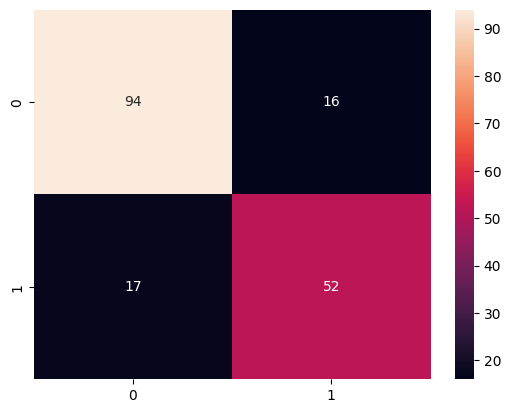

6.6449193398931055


In [14]:
# imort the dataset
dataset = pd.read_csv('./train.csv')

# drop the columns that are not needed
dataset = dataset.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# fill the missing  age values with the mean of the age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# fill the missing fare values with the mean of the fare
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

# replace name with length of the name
dataset['Name'] = dataset['Name'].apply(lambda x: len(x))

# replace Sex with 0 for female and 1 for male
dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x=='female' else x)
dataset['Sex'] = dataset['Sex'].apply(lambda x: 1 if x=='male' else x)
# fill the missing Sex values with average 
dataset['Sex'] = dataset['Sex'].fillna(dataset['Sex'].mean())

# replace Embarked with 0 for S, 1 for C and 2 for Q
dataset['Embarked'] = dataset['Embarked'].apply(lambda x: 0 if x=='S' else x)
dataset['Embarked'] = dataset['Embarked'].apply(lambda x: 1 if x=='C' else x)
dataset['Embarked'] = dataset['Embarked'].apply(lambda x: 2 if x=='Q' else x)
# fill the missing Embarked values with average
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mean())

# split the data as test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Survived'], axis=1), dataset['Survived'], test_size=0.2, random_state=0)

# scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# predict the test set results
y_pred = classifier.predict(X_test)

# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# plot the cost function
from sklearn.metrics import log_loss
cost = log_loss(y_test, y_pred)
print(cost)




In [15]:
# load new data to predict
new_data = pd.read_csv('./test.csv')

# drop the columns that are not needed
new_data = new_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# fill the missing  age values with the mean of the age
new_data['Age'] = new_data['Age'].fillna(new_data['Age'].mean())

# fill the missing fare values with the mean of the fare
new_data['Fare'] = new_data['Fare'].fillna(new_data['Fare'].mean())

# replace name with length of the name
new_data['Name'] = new_data['Name'].apply(lambda x: len(x))

# replace Sex with 0 for female and 1 for male
new_data['Sex'] = new_data['Sex'].apply(lambda x: 0 if x=='female' else x)
new_data['Sex'] = new_data['Sex'].apply(lambda x: 1 if x=='male' else x)
# fill the missing Sex values with average 
new_data['Sex'] = new_data['Sex'].fillna(new_data['Sex'].mean())

# replace Embarked with 0 for S, 1 for C and 2 for Q
new_data['Embarked'] = new_data['Embarked'].apply(lambda x: 0 if x=='S' else x)
new_data['Embarked'] = new_data['Embarked'].apply(lambda x: 1 if x=='C' else x)
new_data['Embarked'] = new_data['Embarked'].apply(lambda x: 2 if x=='Q' else x)
# fill the missing Embarked values with average
new_data['Embarked'] = new_data['Embarked'].fillna(new_data['Embarked'].mean())

# scale the data
new_data = sc.transform(new_data)

# predict the new data
new_data_pred = classifier.predict(new_data)

# prepare the submission file
submission = pd.DataFrame({
        "PassengerId": pd.read_csv('./test.csv')['PassengerId'],
        "Survived": new_data_pred
    })
submission.to_csv('submission.csv', index=False)






